In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC_deliverable_3_1.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from src.vel_rocket_vis import plot_static_states_inputs


rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")


In [3]:
Ts = 0.05
sim_time = 20
H = 10
# x0 = np.zeros(12) # initial state
# x0[5] = np.deg2rad(30.0)   # ≈ 0.5236 
# x0[6] = 5.0  # initial vx
# x0[7] = 5.0  # initial vy
# x0[8] = 5.0  # initial vz# initial wy
#on doit changer un des parametres de xo pour mettre une vitesse dans la direction voulue 
# X -> Xo(6) = Vx, Y-> XO(7) = Vy, Z-> Xo(8) = Vz

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()
x0 = xs.copy()
x0[5] = np.deg2rad(30)
x0[6] = 5.0  # initial vx
x0[7] = 5.0  # initial vy
x0[8] = 5.0  # initial vz# initial wy
xs, us = rocket.trim()
print("us =", us)
print("Pdiff trim us[3] =", us[3])
mpc = MPCVelControl().new_controller(rocket, Ts, H)



t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)


vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

us = [ 0.          0.         66.66666667  0.        ]
Pdiff trim us[3] = 0.0
['A', 'H', 'b']
['A', 'H', 'b']
Simulating time 0.00: u_x: [0.26179985]


/opt/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


u_y: [-0.26180063]
u_z: [39.99999999]
u_roll: [-8.93100659]

Simulating time 0.05: u_x: [0.06890143]
u_y: [-0.26179835]
u_z: [40.00002993]
u_roll: [-7.75603584]

Simulating time 0.10: u_x: [-0.06285633]
u_y: [0.24892918]
u_z: [40.00001654]
u_roll: [-6.69581413]

Simulating time 0.15: u_x: [-0.11055388]
u_y: [0.26046179]
u_z: [40.00002446]
u_roll: [-5.7407089]

Simulating time 0.20: u_x: [-0.10598255]
u_y: [0.02628158]
u_z: [40.00001269]
u_roll: [-4.8816046]

 State alpha violation: 0.17 > 0.17, 
Simulating time 0.25: u_x: [-0.05148389]
u_y: [-0.01831376]
u_z: [40.00002094]
u_roll: [-4.11007457]

 State alpha violation: 0.17 > 0.17, 
Simulating time 0.30: u_x: [0.20697556]
u_y: [0.00937883]
u_z: [40.00001021]
u_roll: [-3.41842024]

 State beta violation: -0.17 < -0.17, 
Simulating time 0.35: u_x: [0.06175038]
u_y: [-0.00462186]
u_z: [40.00001966]
u_roll: [-2.79956701]

 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.40: u_x: [-0.00494758]
u

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

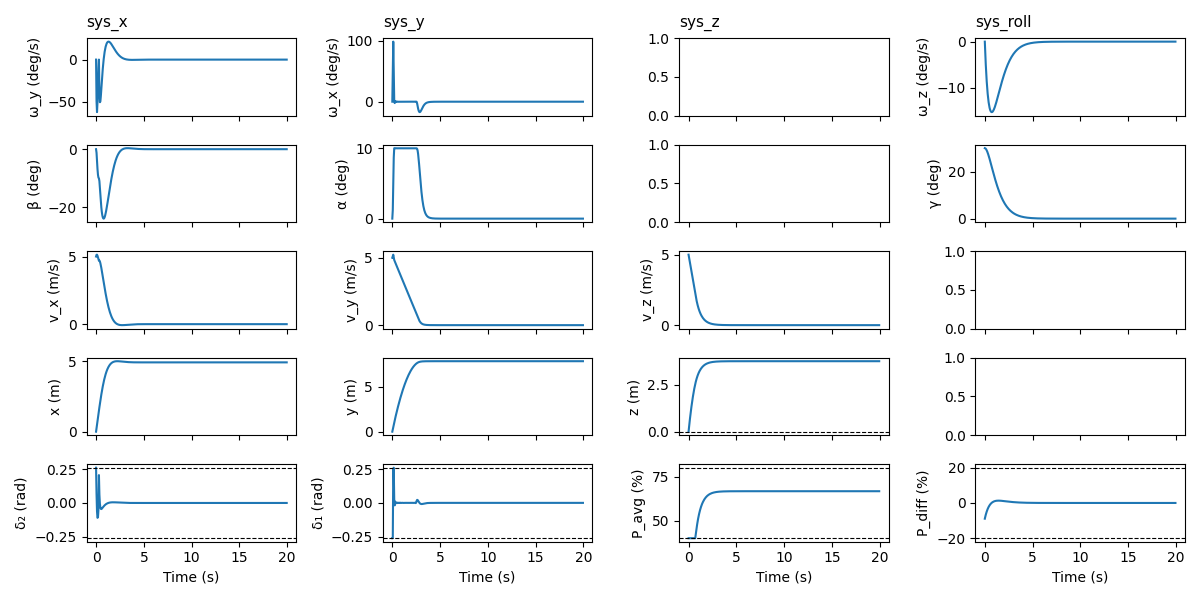

In [4]:
plot_static_states_inputs(
    T=t_cl[:-1],      # time for inputs
    X=x_cl[:, :-1],   # match the same length
    U=u_cl,           # DON'T slice
    Ref=None,
    type="vel"
)



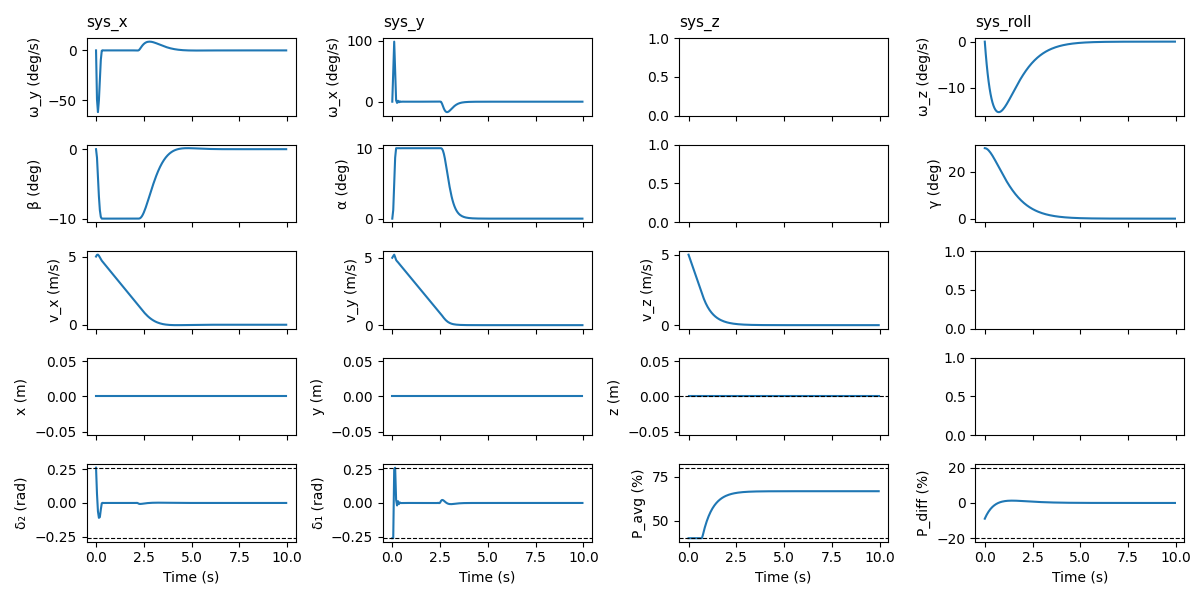

In [5]:
from src.vel_rocket_vis import plot_static_states_inputs

k = 0
T_ol = t_ol[:, k]      # shape (H+1,)
X_ol = x_ol[:, :, k]   # shape (12, H+1)
U_ol = u_ol[:, :, k]   # shape (4, H)

plot_static_states_inputs(
    T=T_ol[:-1],
    X=X_ol[:, :-1],
    U=U_ol,
    Ref=None,
    type="vel"
)


['A', 'H', 'b']
['A', 'H', 'b']


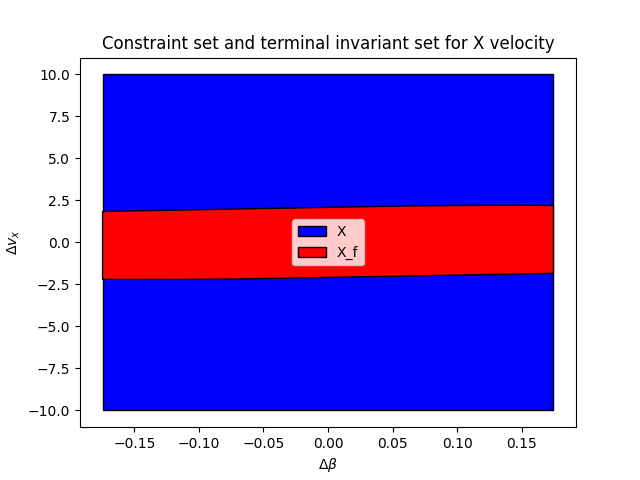

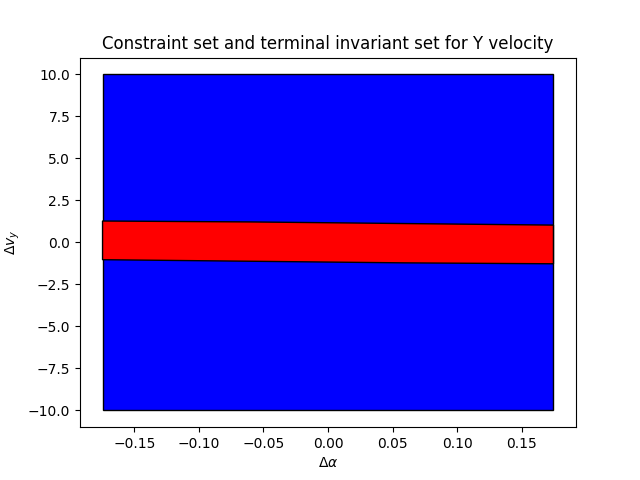

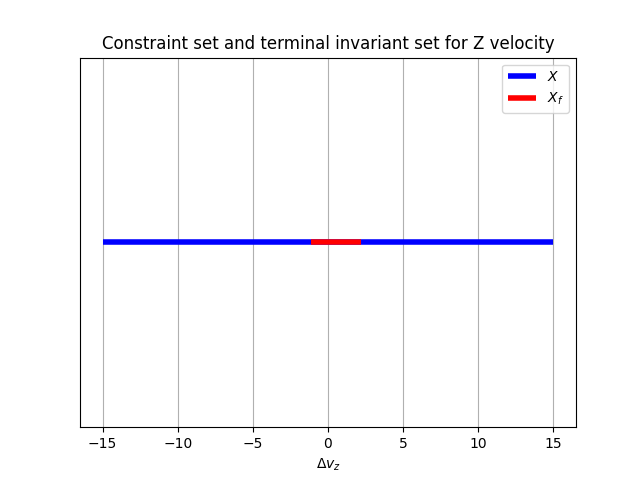

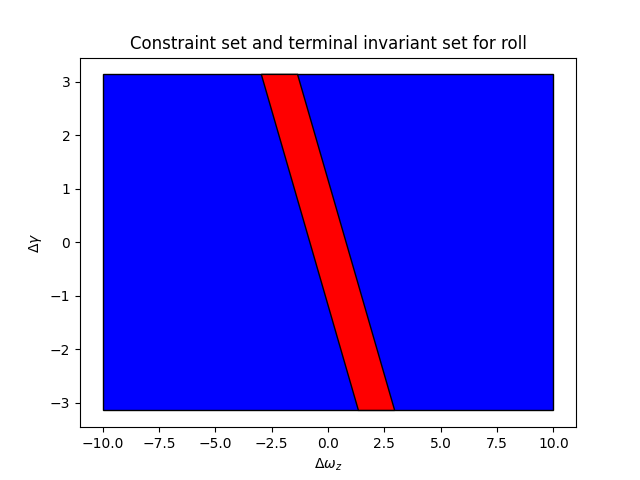

In [7]:
import matplotlib.pyplot as plt
from LinearMPC_deliverable_3_1.MPCControl_xvel import MPCControl_xvel
from LinearMPC_deliverable_3_1.MPCControl_yvel import MPCControl_yvel
from LinearMPC_deliverable_3_1.MPCControl_zvel import MPCControl_zvel
from LinearMPC_deliverable_3_1.MPCControl_roll import MPCControl_roll


P = [1, 2]  # indices in xvel state [ωy, β, vx] -> (β, vx)
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices

Xproj_x  = mpc_x._X.projection(P)
Xfproj_x = mpc_x._Xf.projection(P)

fig, ax = plt.subplots()
Xproj_x.plot(ax=ax, color ="blue", label=r"X")     # state constraint set X (projected)
Xfproj_x.plot(ax=ax, color="red", label=r"X_f")    # terminal set (projected)

ax.set_title(r"Constraint set and terminal invariant set for X velocity")
ax.set_xlabel(r"$\Delta\beta$")
ax.set_ylabel(r"$\Delta v_x$")
plt.legend()
plt.show()



Xproj_y  = mpc_y._X.projection(P)
Xfproj_y = mpc_y._Xf.projection(P)



fig, ax = plt.subplots()
Xproj_y.plot(ax=ax, color ="blue", label=r"X")
Xfproj_y.plot(ax=ax, color="red", label=r"X_f")

ax.set_title(r"Constraint set and terminal invariant set for Y velocity")
ax.set_xlabel(r"$\Delta\alpha$")
ax.set_ylabel(r"$\Delta v_y$")
plt.show()




def interval_from_poly(P):
    A = np.array(P.A, dtype=float).flatten()
    b = np.array(P.b, dtype=float).flatten()
    ub = np.min(b[A > 0] / A[A > 0])
    lb = np.max(b[A < 0] / A[A < 0])
    return lb, ub

lbX, ubX = interval_from_poly(mpc_z._X)
lbXf, ubXf = interval_from_poly(mpc_z._Xf)

fig, ax = plt.subplots()
ax.hlines(0.0, lbX, ubX, color="blue",linewidth=4, label=r"$X$")
ax.hlines(0.0, lbXf, ubXf, color="red",linewidth=4, label=r"$X_f$")
ax.set_title(r"Constraint set and terminal invariant set for Z velocity")
ax.set_xlabel(r"$\Delta v_z$")
ax.set_yticks([])
ax.grid(True)
ax.legend()
plt.show()


fig, ax = plt.subplots()

mpc_roll._X.plot(ax=ax, color ="blue", label=r"X")
mpc_roll._Xf.plot(ax=ax,color="red", label=r"X_f")

ax.set_title(r"Constraint set and terminal invariant set for roll")
ax.set_xlabel(r"$\Delta \omega_z$")
ax.set_ylabel(r"$\Delta \gamma$")
plt.show()


